In [21]:
import numpy as np
import pandas as pd
import os
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.preprocessing import LabelEncoder


# Mount Gdrive
# from google.colab import drive
# drive.mount('/content/drive')

# !ls "/content/drive/My Drive/"


In [12]:
# data_url = '/content/drive/My Drive/Colab Notebooks/ObesityDataSet_raw_and_data_sinthetic.csv'
data_url = '/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv'

df = pd.read_csv(data_url)
df = df.rename(columns={'family_history_with_overweight': 'FHWO'})
df.shape

(2111, 17)

In [13]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,FHWO,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [46]:
df.dtypes

Age           float64
Gender          int64
Height        float64
Weight        float64
CALC            int64
FAVC            int64
FCVC          float64
NCP           float64
SCC             int64
SMOKE           int64
CH2O          float64
FHWO            int64
FAF           float64
TUE           float64
CAEC            int64
MTRANS          int64
NObeyesdad      int64
dtype: object

In [48]:
missing_values = df.isnull().sum()
print(missing_values)

Age           0
Gender        0
Height        0
Weight        0
CALC          0
FAVC          0
FCVC          0
NCP           0
SCC           0
SMOKE         0
CH2O          0
FHWO          0
FAF           0
TUE           0
CAEC          0
MTRANS        0
NObeyesdad    0
dtype: int64


Pre-processing Dataset

In [16]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(2087, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         2087 non-null   float64
 1   Gender      2087 non-null   object 
 2   Height      2087 non-null   float64
 3   Weight      2087 non-null   float64
 4   CALC        2087 non-null   object 
 5   FAVC        2087 non-null   object 
 6   FCVC        2087 non-null   float64
 7   NCP         2087 non-null   float64
 8   SCC         2087 non-null   object 
 9   SMOKE       2087 non-null   object 
 10  CH2O        2087 non-null   float64
 11  FHWO        2087 non-null   object 
 12  FAF         2087 non-null   float64
 13  TUE         2087 non-null   float64
 14  CAEC        2087 non-null   object 
 15  MTRANS      2087 non-null   object 
 16  NObeyesdad  2087 non-null   object 
dtypes: float64(8), object(9)
memory usage: 293.5+ KB


In [18]:
df[['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'CAEC', 'FHWO', 'MTRANS', 'NObeyesdad']] = df[['Gender',
    'CALC', 'FAVC', 'SCC', 'SMOKE', 'CAEC', 'FHWO', 'MTRANS', 'NObeyesdad']].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         2087 non-null   float64 
 1   Gender      2087 non-null   category
 2   Height      2087 non-null   float64 
 3   Weight      2087 non-null   float64 
 4   CALC        2087 non-null   category
 5   FAVC        2087 non-null   category
 6   FCVC        2087 non-null   float64 
 7   NCP         2087 non-null   float64 
 8   SCC         2087 non-null   category
 9   SMOKE       2087 non-null   category
 10  CH2O        2087 non-null   float64 
 11  FHWO        2087 non-null   category
 12  FAF         2087 non-null   float64 
 13  TUE         2087 non-null   float64 
 14  CAEC        2087 non-null   category
 15  MTRANS      2087 non-null   category
 16  NObeyesdad  2087 non-null   category
dtypes: category(9), float64(8)
memory usage: 166.6 KB


Label Encoding

In [22]:
label_encoders = {}
for column in df.columns:
  if df[column].dtype == 'category':
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [23]:
print(label_encoders['MTRANS'].classes_)
print(label_encoders['MTRANS'].transform(label_encoders['MTRANS'].classes_))

['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
[0 1 2 3 4]


In [24]:
def plot_corr(data: pd.core.frame.DataFrame) -> None:
    correlation_matrix = data.corr()
    plt.figure(figsize=(12,12))
    sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7)
    plt.title('Covariance matrix')
    plt.show()

In [25]:
def plot_pie(data: pd.core.series.Series) -> None:
    porc = data.value_counts() * 100 / len(data)
    palette_color = sns.color_palette('pastel')
    plt.pie(porc, labels=porc.index, colors=palette_color, autopct='%.0f%%')
    plt.show()

In [26]:
def plot_bar(data: pd.core.series.Series, xlabel: str, ylabel: str, bool_count=True) -> None:
    if bool_count: counts = data.value_counts().sort_index()
    else: counts = data
    fig, ax1 = plt.subplots()

    ax1.bar(counts.index, counts)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    mean, std = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std) #* len(data)
    if bool_count: ax2.plot(x, y, color='red')
    else: ax2.plot(np.linspace(counts.index.min(), counts.index.max(), 100), y, color='red')

    plt.show()

In [27]:
def plot_scatter(series1: pd.core.series.Series, series2: pd.core.series.Series,
                xlabel: str, ylabel: str) -> None:
    plt.scatter(series1, series2, marker='.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

In [28]:
def plot_bivariate_gaussian(series1: pd.core.series.Series, series2: pd.core.series.Series,
                           xlabel: str, ylabel: str) -> None:
    data = pd.DataFrame({'x1': series1, 'x2': series2})

    mean = data.mean().values
    cov = data.cov().values

    x1, x2 = np.meshgrid(np.linspace(data['x1'].min(), data['x1'].max(), 100),
                         np.linspace(data['x2'].min(), data['x2'].max(), 100))
    pos = np.dstack((x1, x2))

    rv = multivariate_normal(mean, cov)
    pdf = rv.pdf(pos)

    plt.scatter(data['x1'].mean(), data['x2'].mean(), marker='x', color='red')
    plt.contour(x1, x2, pdf, levels=10, cmap='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

In [29]:
def plot_bivariate_scatter(series1: pd.core.series.Series, series2: pd.core.series.Series,
                           xlabel: str, ylabel: str) -> None:
    data = pd.DataFrame({'x1': series1, 'x2': series2})

    mean = data.mean().values
    cov = data.cov().values

    x1, x2 = np.meshgrid(np.linspace(data['x1'].min(), data['x1'].max(), 100),
                         np.linspace(data['x2'].min(), data['x2'].max(), 100))
    pos = np.dstack((x1, x2))

    rv = multivariate_normal(mean, cov)
    pdf = rv.pdf(pos)

    plt.scatter(data['x1'], data['x2'], marker='.')
    plt.contour(x1, x2, pdf, levels=10, cmap='viridis')
    plt.scatter(data['x1'].mean(), data['x2'].mean(), marker='x', color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

In [30]:
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


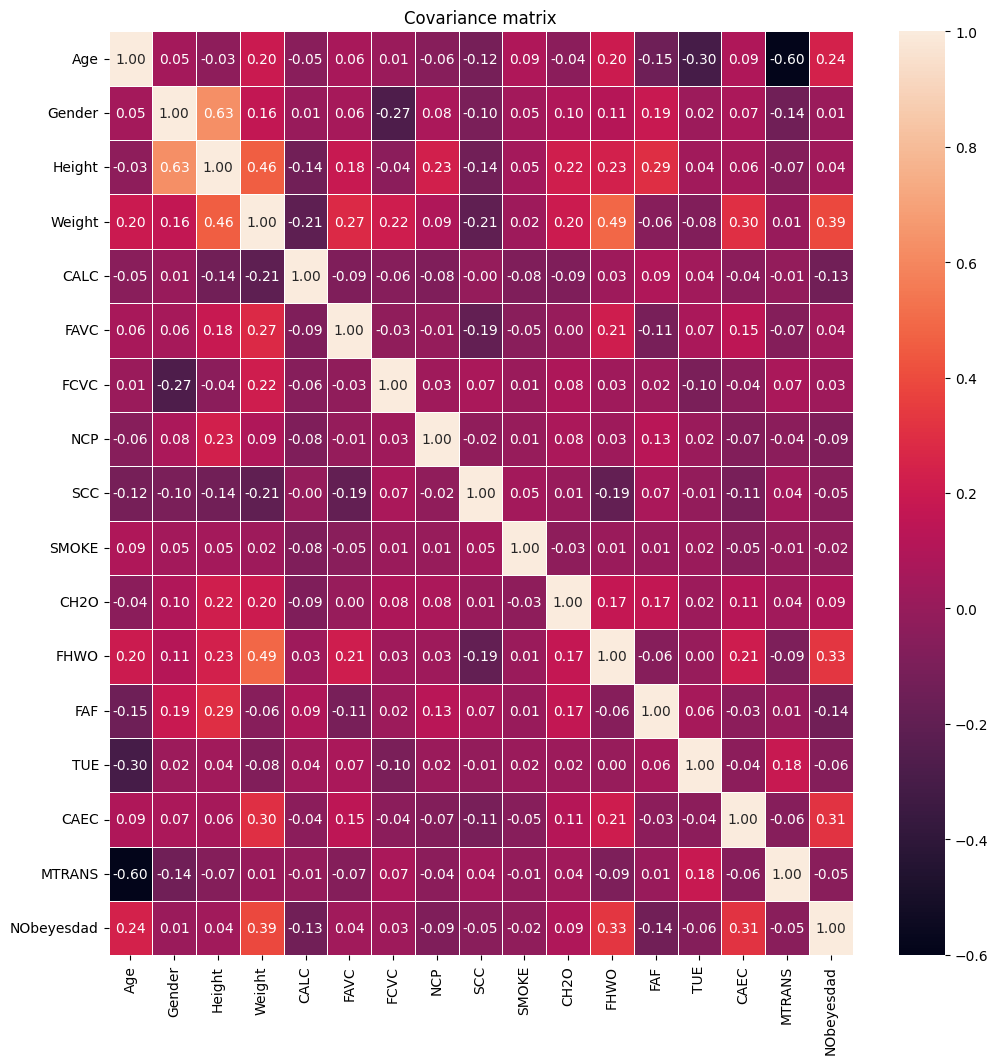

In [31]:
plot_corr(df)

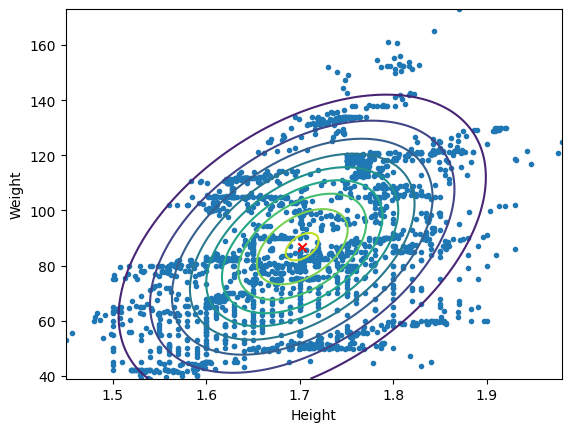

1.7026741221849544 86.85872961427887
0.09318594231105748 26.190847077225722
0.4574680225940451


In [32]:
plot_bivariate_scatter(df['Height'], df['Weight'], 'Height', 'Weight')
print(df['Height'].mean(), df['Weight'].mean())
print(df['Height'].std(), df['Weight'].std())
print(df['Height'].corr(df['Weight']))

In [33]:
print(label_encoders['Gender'].classes_)
print(label_encoders['Gender'].transform(label_encoders['Gender'].classes_))

['Female' 'Male']
[0 1]


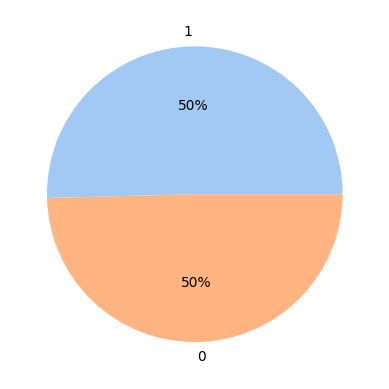

In [34]:
plot_pie(df['Gender'])

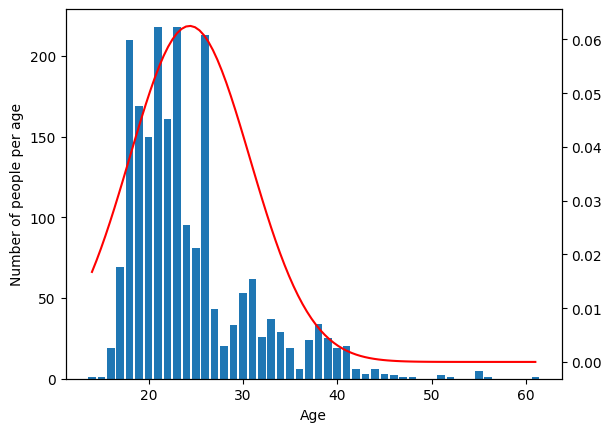

24.356492573071396
6.379977124874268


In [35]:
plot_bar(df['Age'].round(0), 'Age', 'Number of people per age')
print(df['Age'].round(0).mean())
print(df['Age'].round(0).std())

Age Vs Weight

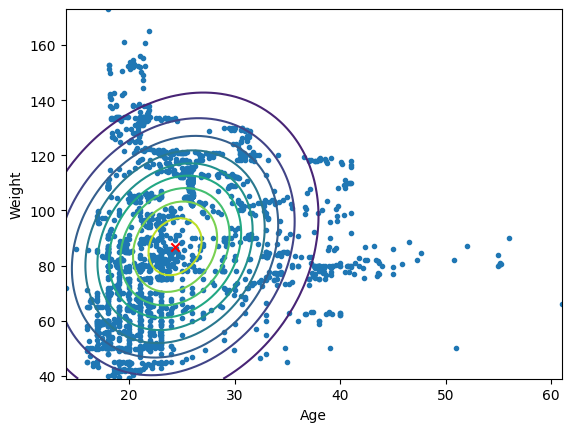

24.353089797316724 , 86.85872961427887
6.368801443907884 , 26.190847077225722
0.19816048936319516


In [36]:
plot_bivariate_scatter(df['Age'], df['Weight'], 'Age', 'Weight')
print(df['Age'].mean(), ',', df['Weight'].mean())
print(df['Age'].std(), ',', df['Weight'].std())
print(df['Age'].corr(df['Weight']))

Age vs Weight | NObeyesdad

In [37]:
print(label_encoders['NObeyesdad'].classes_)
print(label_encoders['NObeyesdad'].transform(label_encoders['NObeyesdad'].classes_))

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
[0 1 2 3 4 5 6]


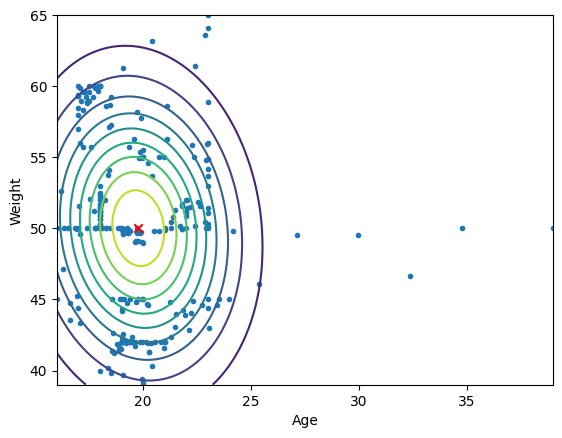

19.771687284644194 , 50.0131904906367
2.688101241636998 , 5.9850039891059845
-0.10342902484473167


In [38]:
# Insufficient_Weight
temp = df.where(df['NObeyesdad'] == 0).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

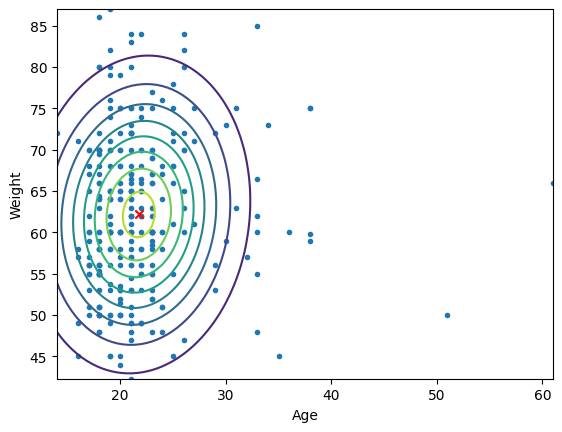

21.75886524822695 , 62.16489361702128
5.121861190324442 , 9.322658741092976
0.08537407715537657


In [39]:
# Normal_Weight
temp = df.where(df['NObeyesdad'] == 1).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

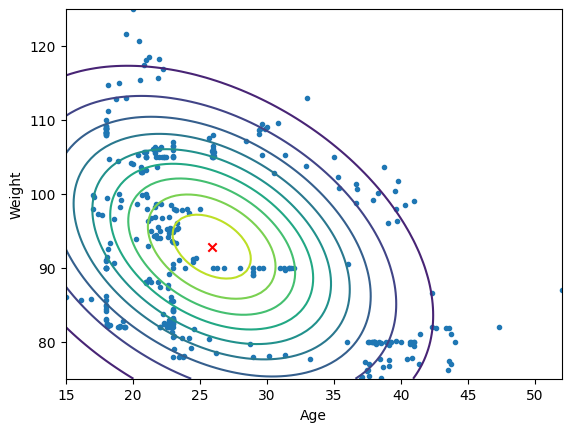

25.884940732193733 , 92.87019836467238
7.755699701710337 , 11.48598675311182
-0.3808534424245283


In [40]:
# Obesity_Type_I
temp = df.where(df['NObeyesdad'] == 2).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

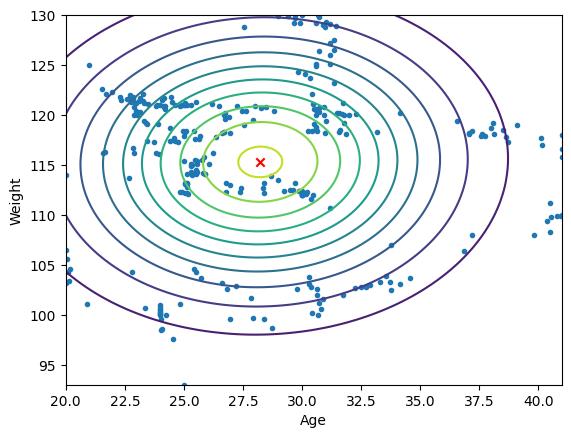

28.23378532323232 , 115.30531125252526
4.868198692331339 , 8.024320012223207
0.019844911442372756


In [41]:
# Obesity_Type_II
temp = df.where(df['NObeyesdad'] == 3).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

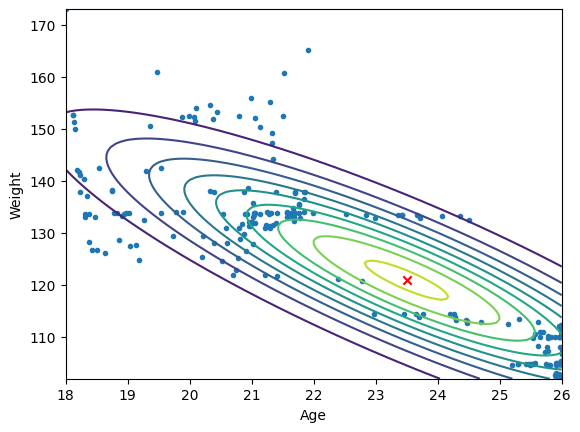

23.495553969135802 , 120.94111437345678
2.764323882197265 , 15.532224991590587
-0.8662727184950716


In [42]:
# Obesity_Type_III
temp = df.where(df['NObeyesdad'] == 4).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

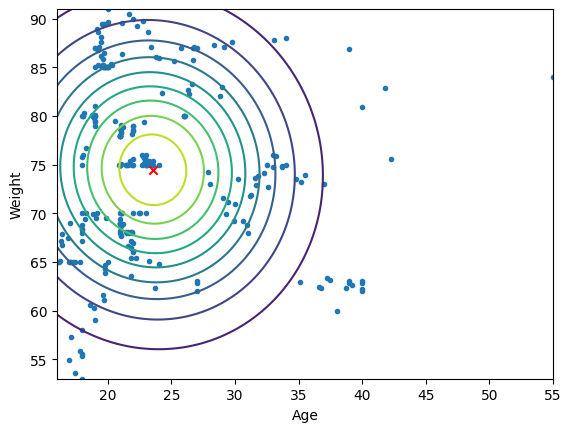

23.54030929347826 , 74.4832611557971
6.254104672307598 , 8.627636459564155
-0.03419797990469311


In [43]:
# Overweight_Level_I
temp = df.where(df['NObeyesdad'] == 5).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

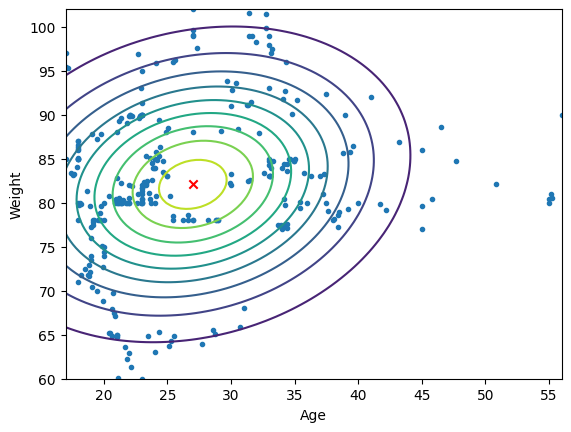

26.996981424137932 , 82.0852711724138
8.06106136023296 , 8.450932258470639
0.1834901752906351


In [44]:
# Overweight_Level_II
temp = df.where(df['NObeyesdad'] == 6).dropna()
plot_bivariate_scatter(temp['Age'], temp['Weight'], 'Age', 'Weight')
print(temp['Age'].mean(), ',', temp['Weight'].mean())
print(temp['Age'].std(), ',', temp['Weight'].std())
print(temp['Age'].corr(temp['Weight']))

Age Vs MTRANS

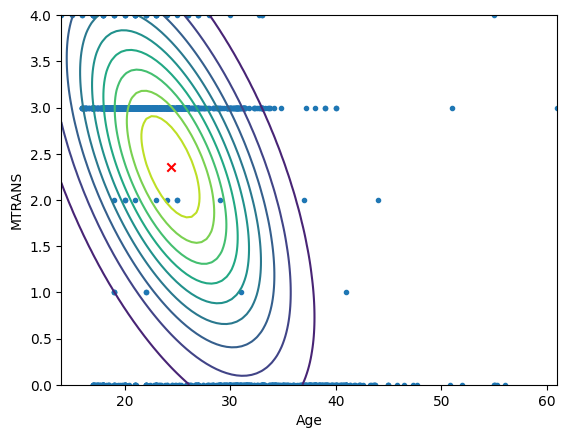

24.353089797316724 , 2.358888356492573
6.368801443907884 , 1.2654022550966826
-0.6014757742834967


In [45]:
plot_bivariate_scatter(df['Age'], df['MTRANS'], 'Age', 'MTRANS')
print(df['Age'].mean(), ',', df['MTRANS'].mean())
print(df['Age'].std(), ',', df['MTRANS'].std())
print(df['Age'].corr(df['MTRANS']))

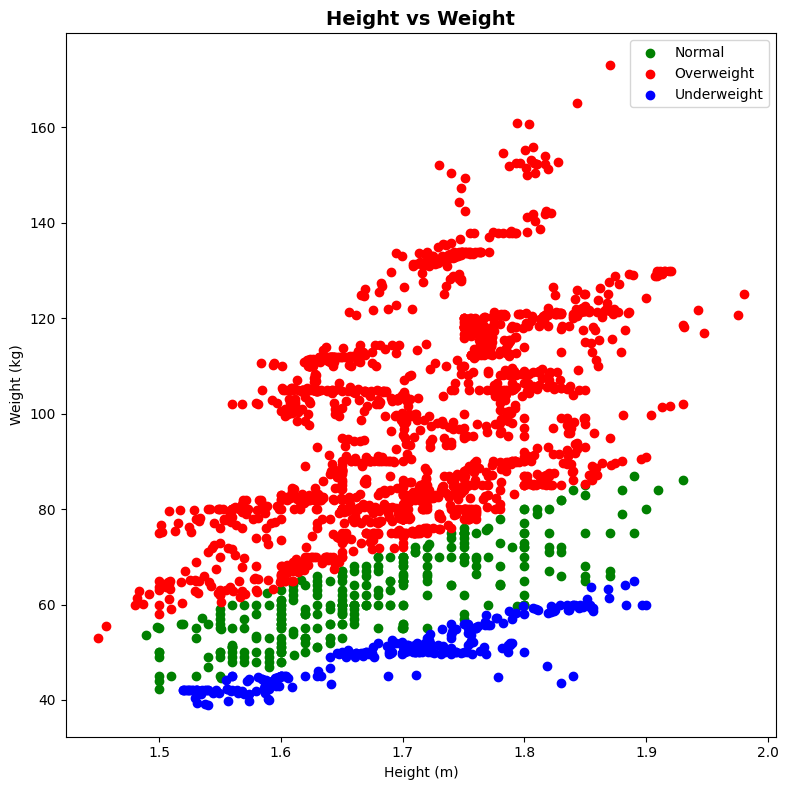

In [49]:
# Define BMI categories and corresponding colors
bmi_colors = {
    "Normal": "green",
    "Overweight": "red",
    "Underweight": "blue"
}

# Calculate BMI for each person in the dataset
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Create a new column to categorize BMI
df['BMI Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, np.inf], labels=["Underweight", "Normal", "Overweight"], right=False)

# Plot the scatterplot with colors based on BMI categories
plt.figure(figsize=(8, 8))
for category, color in bmi_colors.items():
    subset = df[df['BMI Category'] == category]
    plt.scatter(subset['Height'], subset['Weight'], color=color, label=category)

plt.title("Height vs Weight", fontsize=14, fontweight="bold")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.tight_layout()
plt.show()